In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_venn as venn

In [ ]:
# read in data for enslaved people tab
enslaved_tab = pd.read_csv('Census Charlestown 1775 05-14-24 - Enslaved people.csv')

# clean up formatting
enslaved_tab.columns = ['Year of Record', 'Total People Enslaved in Record', '# Male', '# Female', '# Black',
                        '# Native', 'Name and/or Description', 'Enslaver Last Name', 'Enslaver First Name',
                        'Town', 'Unique ID']
enslaved_tab = enslaved_tab.drop([0])

# convert some columns from nan to 0
enslaved_tab['# Male'] = enslaved_tab['# Male'].fillna(0)
enslaved_tab['# Female'] = enslaved_tab['# Female'].fillna(0)
enslaved_tab['# Native'] = enslaved_tab['# Native'].fillna(0)

# convert datatypes
enslaved_tab['Year of Record'] = enslaved_tab['Year of Record'].astype(int)
enslaved_tab['Total People Enslaved in Record'] = enslaved_tab['Total People Enslaved in Record'].astype(int)
enslaved_tab['# Male'] = enslaved_tab['# Male'].astype(int)
enslaved_tab['# Female'] = enslaved_tab['# Female'].astype(int)
enslaved_tab['# Black'] = enslaved_tab['# Black'].astype(int)
enslaved_tab['# Native'] = enslaved_tab['# Native'].astype(int)

enslaved_tab

,Year of Record,Total People Enslaved in Record,# Male,# Female,# Black,# Native,Name and/or Description,Enslaver Last Name,Enslaver First Name,Town,Unique ID
1,1741,1,0,1,1,0,Coelia,Alford,Captain,Charlestown,ID_1
2,1751,1,0,1,1,0,Phillis,Alford,John,Charlestown,ID_2
3,1756,1,1,0,1,0,Cerado,"Alford, Esqr.",John,Charlestown,ID_3
4,1753,1,0,1,1,0,Rose,Angier,R,Charlestown,ID_4
5,1749,1,0,1,1,0,Belinda,Austin,John,Charlestown,ID_5
...,...,...,...,...,...,...,...,...,...,...,...
158,1730,1,0,1,1,0,Pippwe,NaN,NaN,Charlestown,ID_158
159,1760,1,1,0,1,0,Pomp Miller,NaN,NaN,Charlestown,ID_159
160,1753,1,1,0,1,0,Prince Green,NaN,NaN,Charlestown,ID_160
161,1706,1,1,0,1,0,Robert Comings,NaN,NaN,Charlestown,ID_161


Text(1.6, 90, '*6 people listed in the Enslaved People \ntab did not have a listed gender.')

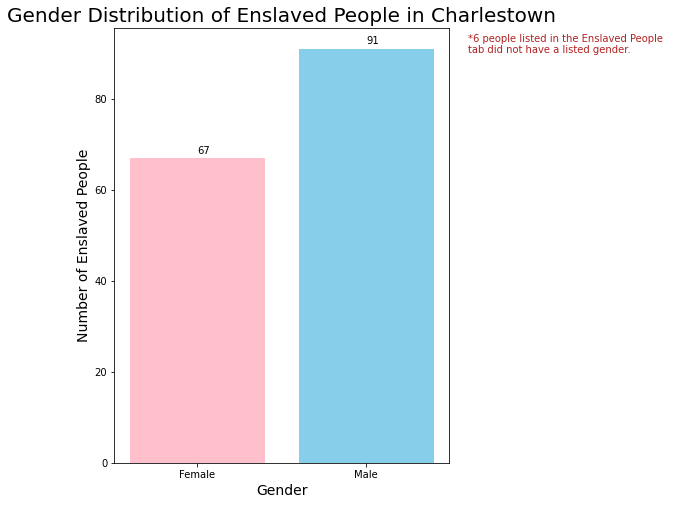

In [ ]:
# get counts of male and female
female_count = enslaved_tab['# Female'].sum()
male_count = enslaved_tab['# Male'].sum()
total_count = enslaved_tab['Total People Enslaved in Record'].sum()

# make bar chart for gender distribution
#custom_font = {'fontname': 'American Typewriter'}
plt.figure(figsize=(6, 8))
plt.bar('Female', female_count, color='pink')
plt.bar('Male', male_count, color='skyblue')
plt.title('Gender Distribution of Enslaved People in Charlestown', fontsize=20) #, **custom_font)
plt.xlabel('Gender', fontsize=14) #, **custom_font)
plt.ylabel('Number of Enslaved People', fontsize=14) #, **custom_font)
plt.text(0, 68, female_count)
plt.text(1, 92, male_count)
plt.text(1.6, 90, '*6 people listed in the Enslaved People \ntab did not have a listed gender.', color='firebrick')

In [ ]:
### use dictionaries to get grouped counts?

In [ ]:
# read in data for census tab
census_tab = pd.read_csv('Census Charlestown 1775 05-14-24 - Census.csv')
census_tab.columns = ['Order', 'Family', 'Original Order', 'Link to Claim', 'Last Name', 'Maiden Name',
                      'First Name', 'Relation to Head of Household', 'Age', 'Sex', 'Race', 'Occupation',
                      'Household Inventory #', '1375 People', 'Household', 'Family Notes', 'Unique ID',
                      'Family V2', 'Household V2']
census_tab = census_tab.drop(0)

# filter for only people who are not white and enslaved
census_race_b_m = census_tab.loc[census_tab['Race'] != 'W']
census_enslaved = census_race_b_m.loc[(census_race_b_m['Relation to Head of Household'] == 'Enslaved') |
                                      (census_race_b_m['Relation to Head of Household'] == 'enslaved')]

# get counts of enslaved people from census tab and enslaved tab
census_enslaved_count = census_enslaved['Order'].count()
enslaved_tab_count = enslaved_tab['Total People Enslaved in Record'].sum()

# look for overlap in tabs based on unique ID
overlap_people = []
overlap_count = 0
census_id_lst = census_enslaved['Unique ID'].to_list()

# iterate through the people in the enslaved tab
for i in range(len(enslaved_tab['Unique ID'])):

    # if match is found, note their name and update counts
    if enslaved_tab['Unique ID'].iloc[i] in census_id_lst:
        overlap_people.append(enslaved_tab['Name and/or Description'].iloc[i])
        overlap_count += 1
        census_enslaved_count -= 1
        enslaved_tab_count -= 1

# make venn diagram showing consistency across tabs
plt.figure(figsize=(6, 8))
venn.venn2(subsets=(census_enslaved_count, enslaved_tab_count, overlap_count),
      set_labels=('Enslaved People in Census Tab', 'Enslaved People in Enslaved People Tab'),
      set_colors=('lightcoral', 'skyblue'))
venn.venn2_circles(subsets=(census_enslaved_count, enslaved_tab_count, overlap_count))
plt.title('Consistency of Enslaved People Listed Across Tabs', fontsize=20)

In [ ]:
# collect number of records per year
record_year_dict = {}
for i in range(len(enslaved_tab['Year of Record'])):
    if enslaved_tab['Year of Record'].iloc[i] in record_year_dict.keys():
        record_year_dict[enslaved_tab['Year of Record'].iloc[i]] += 1
    else:
        record_year_dict[enslaved_tab['Year of Record'].iloc[i]] = 1

# add 0 to years which are not listed in data
year_range = [i for i in range(1700, 1776)]
for i in year_range:
    if i not in record_year_dict.keys():
        record_year_dict[i] = 0

# convert dictionary to list of tuples sorted by year
record_year_lst = [(key, value) for key, value in record_year_dict.items()]
record_year_lst.sort(key=lambda tup: tup[0])

# make separate lists for x and y
years = []
num_records = []
for year in record_year_lst:

    # do not include records after 1775
    if year[0] > 1775:
        break

    years.append(year[0])
    num_records.append(year[1])

# plot number of records over time
plt.figure(figsize=(6, 8))
plt.plot(years, num_records)
plt.title('Number of Slave Records Over Time', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# add average line
record_year_avg = sum(num_records) / len(num_records)
plt.axhline(y=record_year_avg, color='red', linestyle='--', label=f'Average: {round(record_year_avg, 2)}')

plt.legend(bbox_to_anchor=(0.35, 1))
plt.show()

In [ ]:
# get number of common names
# count first time attached to ID to make sure we are not double counting the same person
names_id_dict = {}
for i in range(len(enslaved_tab['Name and/or Description'])):
    name_id = enslaved_tab['Name and/or Description'].iloc[i] + '_' + enslaved_tab['Unique ID'].iloc[i]
    if name_id in names_id_dict.keys():
        names_id_dict[name_id] += 1
    else:
        names_id_dict[name_id] = 1

# count second time after distinct people have been identified
names_dict = {}
for key in names_id_dict.keys():
    name = key.split('_')[0]
    if name in names_dict.keys():
        names_dict[name] += 1
    else:
        names_dict[name] = 1

# make list of names that appear more than once
common_names = []
for key, value in names_dict.items():
    if value > 1:
        common_names.append((key, value))

# sort the list from greatest to least
common_names.sort(key=lambda tup: tup[1])

# make separate lists for x and y
common_names_x = []
common_names_y = []
for name in common_names:

    # do not include descriptions
    if name[0] == 'servant' or name[0] == 'man':
        pass

    else:
        common_names_x.append(name[0])
        common_names_y.append(name[1])

# plot the data
plt.figure(figsize=(6, 8))
plt.barh(common_names_x, common_names_y)
plt.title('Common Names of Enslaved People in Charlestown', fontsize=20)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.text(6.5, 16, '*Did not include descriptions such \nas servant or man.', color='firebrick')

Text(8.65, 25, '*28 enslaved people did not \nhave an enslaver listed.')

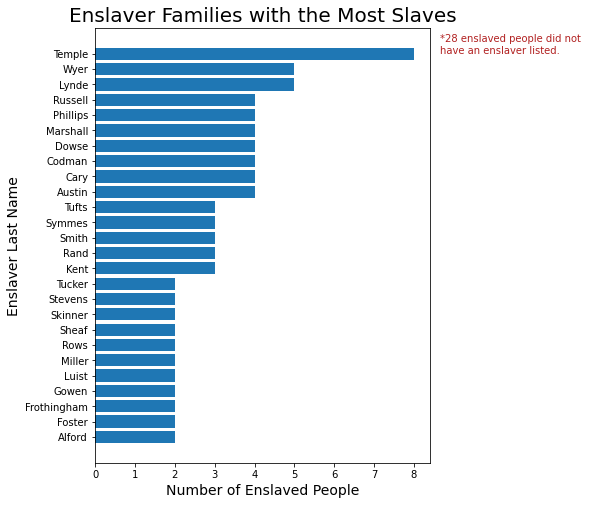

In [ ]:
# get number of enslaved people by enslaver family
enslaver_names_dict = {}
for i in range(len(enslaved_tab['Enslaver Last Name'])):
    if enslaved_tab['Enslaver Last Name'].iloc[i] in enslaver_names_dict.keys():
        enslaver_names_dict[enslaved_tab['Enslaver Last Name'].iloc[i]] += 1
    else:
        enslaver_names_dict[enslaved_tab['Enslaver Last Name'].iloc[i]] = 1

# make list of enslaver families that enslaved more than one person
enslaver_names_lst = []
for key, value in enslaver_names_dict.items():
    if value > 1:
        enslaver_names_lst.append((key, value))

# sort the list from greatest to least
enslaver_names_lst.sort(key=lambda tup: tup[1])

# make separate lists for x and y
enslaver_names_x = []
enslaver_names_y = []
for name in enslaver_names_lst:

    # skip nan values
    if enslaver_names_lst.index(name) == 26:
        pass

    else:
        enslaver_names_x.append(name[0])
        enslaver_names_y.append(name[1])

# plot the data
plt.figure(figsize=(6, 8))
plt.barh(enslaver_names_x, enslaver_names_y)
plt.title('Enslaver Families with the Most Slaves', fontsize=20)
plt.xlabel('Number of Enslaved People', fontsize=14)
plt.ylabel('Enslaver Last Name', fontsize=14)
plt.text(8.65, 25, '*28 enslaved people did not \nhave an enslaver listed.', color='firebrick')

In [ ]:
import altair as alt
from vega_datasets import data

In [ ]:
# filter data for just families with more than one slave
multi_slaves_lst = []

for i in range(len(enslaved_tab['Enslaver Last Name'])):
    if enslaved_tab['Enslaver Last Name'].iloc[i] in enslaver_names_x:
        multi_slaves_lst.append(enslaved_tab.iloc[i])

multi_slaves = pd.DataFrame(multi_slaves_lst, columns=['Year of Record', 'Total People Enslaved in Record', '# Male', '# Female', '# Black',
                        '# Native', 'Name and/or Description', 'Enslaver Last Name', 'Enslaver First Name',
                        'Town', 'Unique ID'])

In [ ]:
base = (
    alt.Chart(data=multi_slaves)
    .transform_aggregate(count_="count()", groupby=["Enslaver Last Name", "Enslaver First Name"])
    .transform_stack(
        stack="count_",
        as_=["stack_count_Enslaver_Last_Name1", "stack_count_Enslaver_Last_Name2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
        groupby=[],
    )
    .transform_window(
        x="min(stack_count_Enslaver_Last_Name1)",
        x2="max(stack_count_Enslaver_Last_Name2)",
        rank_First="dense_rank()",
        distinct_First="distinct(Enslaver First Name)",
        groupby=["Enslaver Last Name"],
        frame=[None, None],
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    )
    .transform_window(
        rank_Last="dense_rank()",
        frame=[None, None],
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
    )
    .transform_stack(
        stack="count_",
        groupby=["Enslaver Last Name"],
        as_=["y", "y2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    )
    .transform_calculate(
        ny="datum.y + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        ny2="datum.y2 + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        nx="datum.x + (datum.rank_Last - 1) * 0.01",
        nx2="datum.x2 + (datum.rank_Last - 1) * 0.01",
        xc="(datum.nx+datum.nx2)/2",
        yc="(datum.ny+datum.ny2)/2",
    ).properties(
        height=300,
        width=2000
    )
)


rect = base.mark_rect().encode(
    x=alt.X("nx:Q").axis(None),
    x2="nx2",
    y="ny:Q",
    y2="ny2",
    color=alt.Color("Enslaver Last Name:N").legend(None),
    opacity=alt.Opacity("Enslaver First Name:N").legend(None),
    tooltip=["Enslaver Last Name:N", "Enslaver First Name:Q"],
)


text = base.mark_text(baseline="middle").encode(
    alt.X("xc:Q").axis(None),
    alt.Y("yc:Q").title("Enslaver First Name"),
    text="Enslaver First Name:N"
)

mosaic = rect + text

origin_labels = base.mark_text(baseline="middle", align="center").encode(
    alt.X("min(xc):Q").title("Enslaver Last Name").axis(orient="top"),
    alt.Color("Enslaver Last Name").legend(None),
    text="Enslaver Last Name",
)

(
    (origin_labels & mosaic)
    .resolve_scale(x="shared")
    .configure_view(stroke="")
    .configure_concat(spacing=10)
    .configure_axis(domain=False, ticks=False, labels=False, grid=False)
)

alt.VConcatChart(...)